<a href="https://colab.research.google.com/github/benedictlai/thinkful-challenges/blob/master/Copy_of_Final_Project_Final_Version_November_25%2C_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import scipy
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore")

# Introduction to my Final Project

What is the problem you are attempting to solve?

I am attempting to solve customer trends with Telco Company. For example, I want to solve if a customer is going to churn based on the tenure of the customer, the preferences for contracts and if they are a senior citizen. I mention senior citizens because they are used to paying bills through the mail and they may not be benefitting from getting a discount to keep them from staying with the company.

How is your solution valuable?

My solution is valuable because it will help determine if tenure customers are more likely to churn based on customer behavior such as the preferences for contracts, how long they have been a customer with Telco, and if they are a senior citizen. These factors may impact on customer retention. The results of my research will not only benefit Telco Company but it will also benefit other companies so it can inspire other customers to give true feedback to the company especially with the preferences of contracts.

What is your data source and how will you access it?

The data source is from https://www.kaggle.com/blastchar/telco-customer-churn. They are 7,044 customers in the dataset. I will not be using the whole data set because of some of the null values (TotalCharges) that may affect it.

What techniques from the course do you anticipate using?

I anticipate using Logistic Regression, Gradient Boosting & Random Forest Classifier, Support Vector Machine, Feature Importances.

What do you anticipate to be the biggest challenge you’ll face?

Getting the best accuracy rate on churn, cleaning messy data, handling the class imbalance are the biggest hurdles I'll face.

# Introducing Data

In [0]:
telco = pd.read_csv('https://raw.githubusercontent.com/benedictlai/thinkful-challenges/master/telco(7).csv')
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MCGroup,TCGroup,Churned
0,6260-XLACS,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,117.8,No,0-14,$0-$19.99,$0-$999.99,0
1,0661-KQHNK,Female,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.00,105.5,No,0-14,$0-$19.99,$0-$999.99,0
2,0895-LNKRC,Male,0,Yes,Yes,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,113.5,No,0-14,$0-$19.99,$0-$999.99,0
3,1015-JPFYW,Male,0,No,Yes,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,No,0-14,$0-$19.99,$0-$999.99,0
4,1226-JZNKR,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.80,160.05,No,0-14,$0-$19.99,$0-$999.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No,70-75,$90-$119.99,$8500-$8999.99,0
7039,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No,70-75,$90-$119.99,$8500-$8999.99,0
7040,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.1,No,70-75,$90-$119.99,$8500-$8999.99,0
7041,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.4,No,70-75,$90-$119.99,$8500-$8999.99,0


# Data Information

Q1: Gender? - Categorical

Classes: Male or Female

Q2: SeniorCitizen? - Numerical 

Classes: 0 (no) or 1(Yes)

Q3: Partner - Categorical

Classes: Yes or No 

Q4: Dependents - Categorical

Classes: Yes or No 

Q5: tenure - Numerical

Classes: 1- 72

Q6: PhoneService - Categorical

Classes: Yes or No 

Q7: MultipleLines - Categorical

Classes: Yes, No, or No Phone Service

Q8: InternetService - Categorical

Classes: DSL, Fiber Optic, or No

Q9. OnlineSecurity - Categorical

Classes: Yes, No, or No Internet Service

Q10. OnlineBackup - Categorical

Classes: Yes, No, or No Internet Service

Q11. DeviceProtection - Categorical

Classes: Yes, No, or No Internet Service

Q12. TechSupport - Categorical 

Classes: Yes, No, or No Internet Service

Q13. StreamingTV - Categorical 

Classes: Yes, No, or No Internet Service

Q14. StreamingMovies - Categorical

Classes: Yes, No, or No Internet Service

Q15. Contract - Categorical

Classes: Month-to-Month, One Year, Two Year 

Q16. PaperlessBilling	- Categorical 

Classes: Yes or No  

Q17. PaymentMethod - Categorical

Classes: Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check

Q18. MonthlyCharges - Continuous

Classes: 18.25-118.75

Q19: TotalCharges - Continuous

Classes: 18.8-8684.8 

Q20. Churn - Categorical

Classes: Yes or No

I added three categories below to cluster them into groups in Excel since the data was all over the place for Tenure, MonthlyCharges, and TotalCharges.

Q21. TenureGroup - Continuous

Classes: 0-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74

Q22. MCGroup - Continuous

Classes: 0-19.99, 20-29.99, 30-39.99, 40-49.99, 50-59.99, 60-69.99, 70-79.99, 80-89.99, 90-119.99

Q23. TCGroup - Continuous

Classes: 0-999.99, 1000-1499.99, 1500-1999.99, 2000-2499.99, 2500-2999.99, 3000-3499.99, 3500-3999.99, 4000-4499.99, 4500-4999.99, 5000-5499.99, 5500-5999.99, 6000-6499.99, 6500-6999.99, 7000-7499.99, 7500-7999.99, 8000-8499.99, 8500-8999.99

I got this data from Kaggle, which is from https://www.kaggle.com/blastchar/telco-customer-churn.



In [0]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
TenureGroup          object
MCGroup              object
TCGroup              object
Churned               int64
dtype: object

In [0]:
telco.isnull().sum().sort_values(ascending=False)

TCGroup             11
Churned              0
DeviceProtection     0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
TenureGroup          0
MCGroup              0
customerID           0
dtype: int64

In [0]:
telco['Contract'].fillna("Uncertain",inplace = True)

# Data Analysis

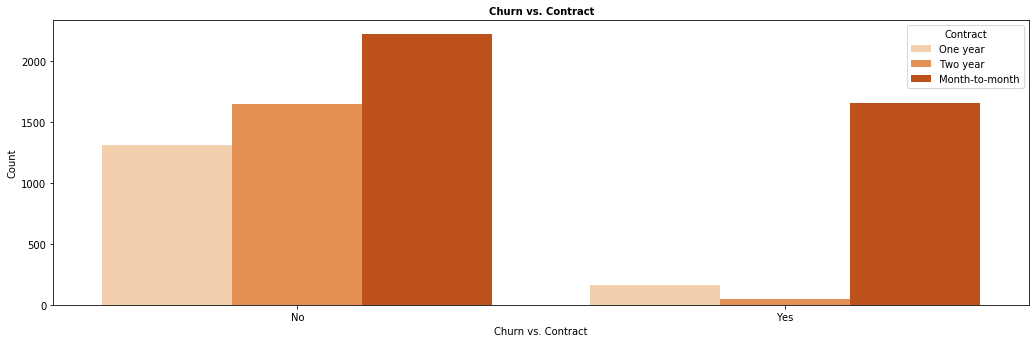

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="Contract", palette="Oranges",data=telco)
plt.title("Churn vs. Contract",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Contract")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More customers are more likely to not recommend the company with a month-to-month contract based on those who voted "Yes" to churn. A reason those types of customers only can to month-to-month contract is that they have a limited budget that prevents them from doing yearly contracts. Those types of customers may experience late fees for not paying on time, which inflates their decision to not recommend the company when the company is not at fault.

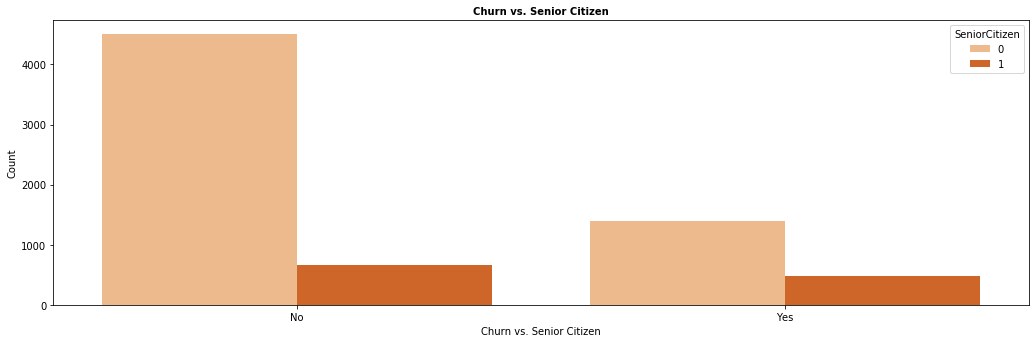

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="SeniorCitizen", palette="Oranges",data=telco)
plt.title("Churn vs. Senior Citizen",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Senior Citizen")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Senior citizens are less likely to churn because there is an implication they receive a discount on services. Another implication may not be the discount, but their loyalty to the company (which causes them to have more incentives for them being with the company long). I predicted senior citizens were going to churn from the company because companies now emphasize on paperless billing. In the graph below, senior citizens did not sign up for paperless billing, which meant they are used to paying bills by mail.

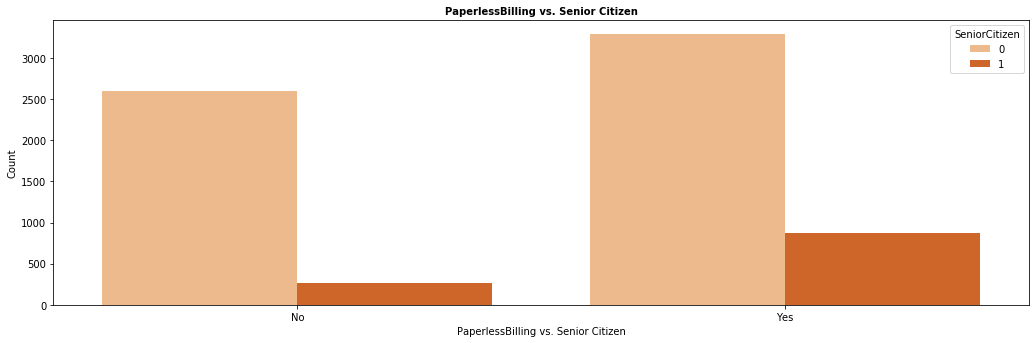

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("PaperlessBilling", hue="SeniorCitizen", palette="Oranges",data=telco)
plt.title("PaperlessBilling vs. Senior Citizen",fontsize=10,fontweight="bold")
plt.xlabel("PaperlessBilling vs. Senior Citizen")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

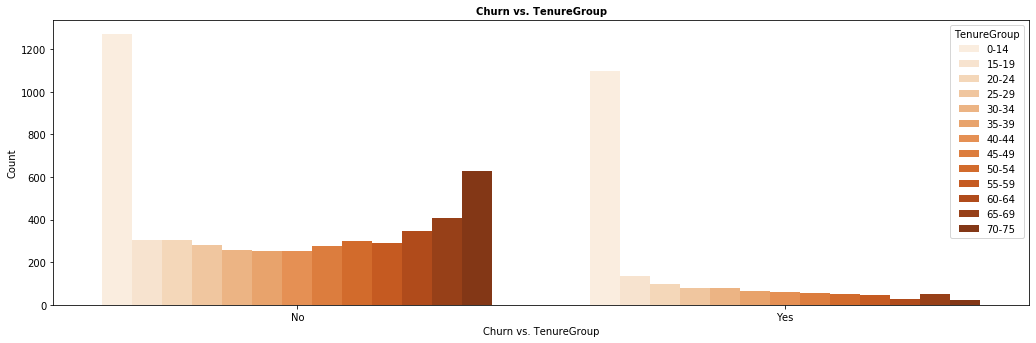

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="TenureGroup", palette="Oranges",data=telco)
plt.title("Churn vs. TenureGroup",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. TenureGroup")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Customers who have been with the company longer are less likely to churn because there is an implication they receive a special discount for staying with the company for a while. Those customers who have stayed with the company for less than 15 years did not recommend the company and were not patient enough to stay longer with the company.




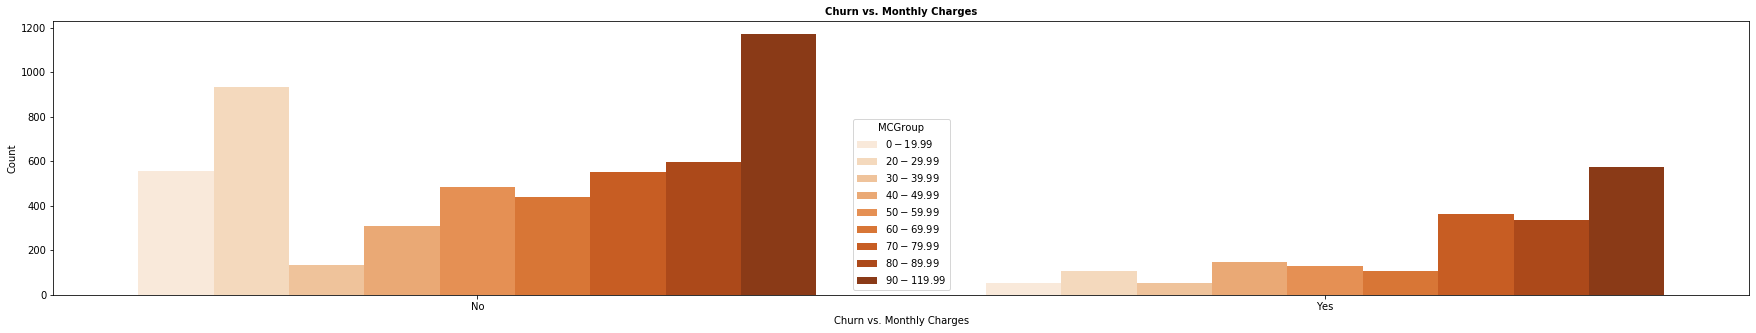

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="MCGroup", palette="Oranges",data=telco)
plt.title("Churn vs. Monthly Charges",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Monthly Charges")
plt.ylabel("Count")
plt.subplots_adjust(top=2.35, bottom=1.59, right=2.48)
plt.show()

Customers who paid `$70/month` were most likely to churn due to the expensive services offered. Those who paid less than $30 were satisfied with the services, which implicates they still recommended the service.

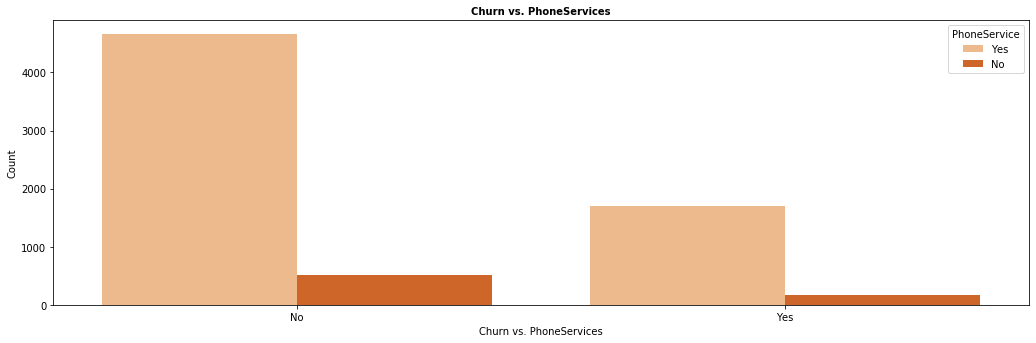

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="PhoneService", palette="Oranges",data=telco)
plt.title("Churn vs. PhoneServices",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. PhoneServices")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More customers (who churned) voted yes to having phone service. Those churned customers that had phone service were unlikely satisfied with their services based on quality, and/or price.

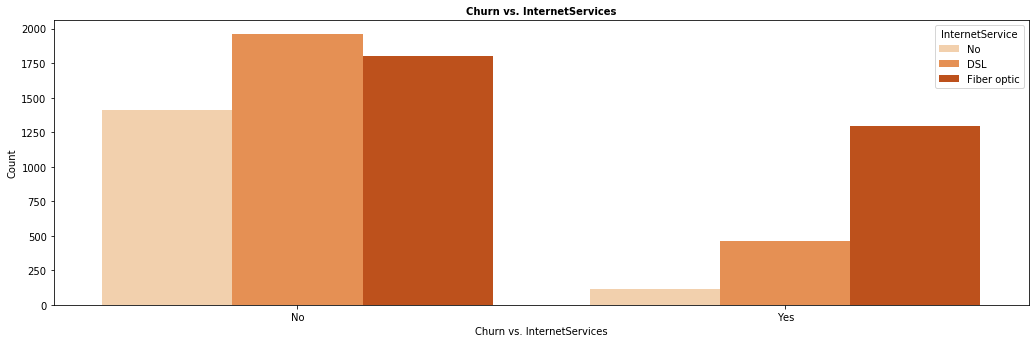

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="InternetService", palette="Oranges",data=telco)
plt.title("Churn vs. InternetServices",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. InternetServices")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Those churned customers were the ones who had Fiber Optic. Because Fiber Optic is faster than DSL, it is an implication that it was more expensive.

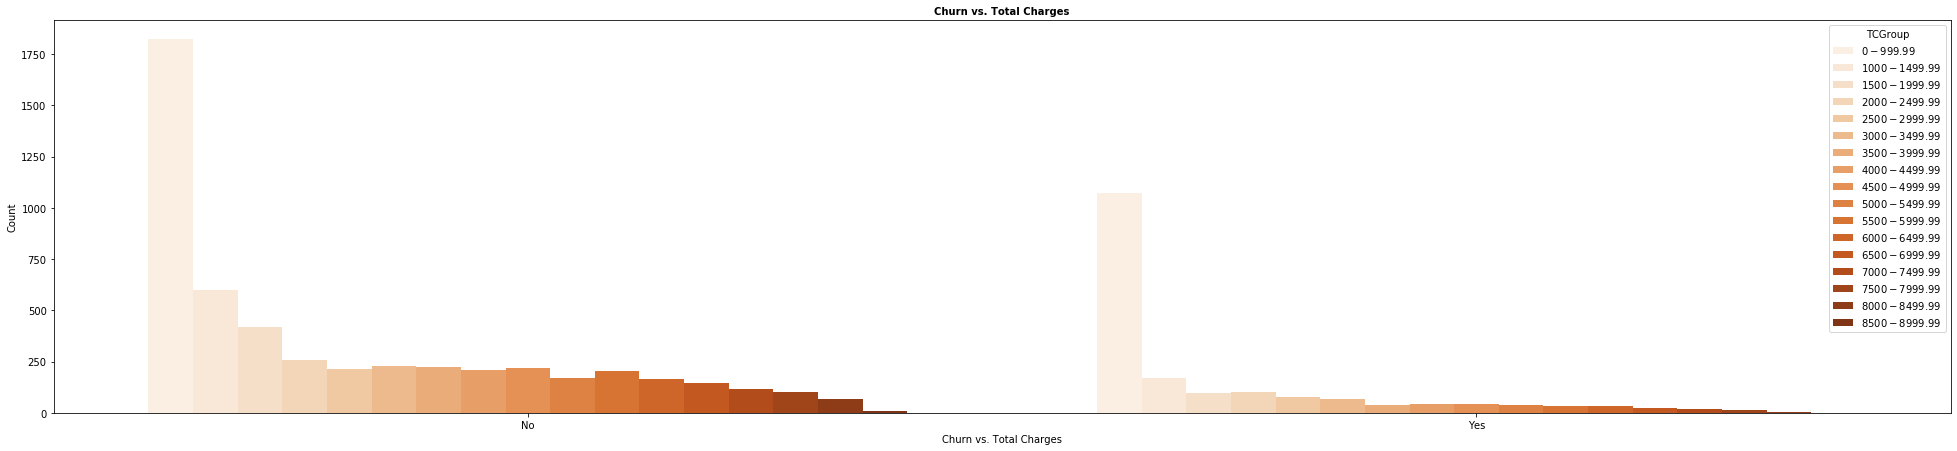

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="TCGroup", palette="Oranges",data=telco)
plt.title("Churn vs. Total Charges",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Total Charges")
plt.ylabel("Count")
plt.subplots_adjust(top=4.88, bottom=3.79, right=2.76)
plt.show()

Those churned customers are theones that paid a total of $1,000 month. The more they paid in total, they less of a chance they would churn the company.

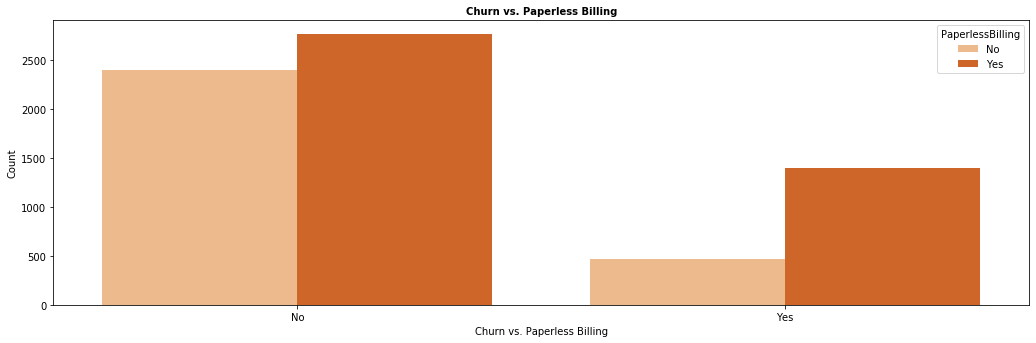

In [0]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="PaperlessBilling", palette="Oranges",data=telco)
plt.title("Churn vs. Paperless Billing",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Paperless Billing")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Those who did churn actually did vote for paperless billing as their preference. What I learned from it is that not choosing paperless billing does not always play in a factor of a customer churning.

---



In [0]:
lb = LabelEncoder()

for col in telco.columns:
  telco[col]=lb.fit_transform(telco[col])

In [0]:
telco.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MCGroup,TCGroup,Churned
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370,4.531592,4.816555,0.690473,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561,4.427614,2.824181,0.833755,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000,3.000000,6.000000,0.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000,9.000000,7.000000,1.000000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000,12.000000,8.000000,2.000000,1.000000


In [0]:
X= telco[['Contract', 'SeniorCitizen', 'TenureGroup','MCGroup','PhoneService','InternetService','TCGroup','PaperlessBilling']]
y= telco['Churn']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [0]:
import timeit

%timeit pass

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("\n")
print("The Logistic Regression results are below:")
print("Accuracy:",lr_acc_score*100)
print("F1:",f1_score(y_test, lr_predict, average="macro")*100)
print("Precision:",precision_score(y_test,lr_predict, average="macro")*100)
print("Recall:",recall_score(y_test, lr_predict, average="macro")*100) 
print("Cross Validation:", cross_val_score(lr, X_train, y_train, cv=3)*100)
print("\n")

print("Here is the confusion matrix below:\n",lr_conf_matrix)

100000000 loops, best of 3: 7.53 ns per loop


The Logistic Regression results are below:
Accuracy: 79.08187411263606
F1: 71.66604777368418
Precision: 73.59812103906592
Recall: 70.46565701356438
Cross Validation: [79.07542579 79.0626902  77.90626902]


Here is the confusion matrix below:
 [[1376  167]
 [ 275  295]]


In [0]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.54 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.16422148603881
F1: 73.93137011779294
Precision 77.00831847890672
Recall: 72.22334026901342
Cross Validation: [78.89294404 78.75836884 78.51491175]


Here is the confusion matrix below:
 [[1414  129]
 [ 269  301]]


In [0]:
%timeit pass

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print('\n')
print("The Random Forest Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_rfc )*100)
print("F1:",f1_score(y_test,pred_rfc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_rfc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_rfc, average="macro")*100) 
print("Cross Validation:", cross_val_score(rfc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_rfc))

The slowest run took 133.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 3: 7.53 ns per loop


The Random Forest Classifier results are below:
Accuracy: 78.98722195929957
F1: 72.14916759683663
Precision: 73.34214844295491
Recall: 71.28588645950586
Cross Validation: [77.37226277 76.44552648 75.47169811]


Here is the confusion matrix below:
 [[1358  185]
 [ 259  311]]


In [0]:

%timeit pass

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print('\n')
print("The Support Vector Machine (Classifier) results are below:")
print("Accuracy:",accuracy_score(y_test,pred_svc )*100)
print("F1:",f1_score(y_test, pred_svc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_svc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_svc, average="macro")*100) 
print("Cross Validation:", cross_val_score(svc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_svc))

100000000 loops, best of 3: 7.52 ns per loop


The Support Vector Machine (Classifier) results are below:
Accuracy: 79.9810695693327
F1: 71.76141305566938
Precision: 75.49337570559982
Recall: 69.97504292162682
Cross Validation: [79.31873479 78.51491175 78.63664029]


Here is the confusion matrix below:
 [[1415  128]
 [ 295  275]]


# Unit 5 Specification



# Which gender of tenured customers more likely to churn?

0 is Male and 1 is Female



In [0]:
print('1 year at Telco Company')
telco1 = telco.loc[telco['tenure'] == 1]
telco1 = telco1.groupby(telco1['gender'])['Churned'].mean()
print(telco1)
print(stats.kstest(telco1, 'norm'))
print('\n')

print('2 years at Telco Company')
telco2 = telco.loc[telco['tenure'] == 2]
telco2 = telco2.groupby(telco2['gender'])['Churned'].mean()
print(telco2)
print(stats.kstest(telco2, 'norm'))
print('\n')

print('3 years at Telco Company')
telco3 = telco.loc[telco['tenure'] == 3]
telco3= telco3.groupby(telco3['gender'])['Churned'].mean()
print(telco3)
print(stats.kstest(telco3, 'norm'))
print('\n')

print('4 years at Telco Company')
telco4 = telco.loc[telco['tenure'] == 4]
telco4= telco4.groupby(telco4['gender'])['Churned'].mean()
print(telco4)
print(stats.kstest(telco4, 'norm'))
print('\n')

print('5 years at Telco Company')
telco5 = telco.loc[telco['tenure'] == 5]
telco5= telco5.groupby(telco5['gender'])['Churned'].mean()
print(telco5)
print(stats.kstest(telco5, 'norm'))
print('\n')


1 year at Telco Company
gender
0    0.654930
1    0.589666
Name: Churned, dtype: float64
KstestResult(statistic=0.7222925868319272, pvalue=0.15424281465700537)


2 years at Telco Company
gender
0    0.523077
1    0.509259
Name: Churned, dtype: float64
KstestResult(statistic=0.6947147446423894, pvalue=0.18639817427752306)


3 years at Telco Company
gender
0    0.495050
1    0.444444
Name: Churned, dtype: float64
KstestResult(statistic=0.6716393567181147, pvalue=0.21564142411298706)


4 years at Telco Company
gender
0    0.534091
1    0.409091
Name: Churned, dtype: float64
KstestResult(statistic=0.6587635262502591, pvalue=0.23288466203431518)


5 years at Telco Company
gender
0    0.469697
1    0.492537
Name: Churned, dtype: float64
KstestResult(statistic=0.6807142334114626, pvalue=0.20388680149205993)




I chose Tenured Customers because they were relevant to the data set with Churning. I broke down by each gender and it seems that more males in the first few years as a customer were more likely to churn. This indicates more females are better at paying bills on time than men. 

Also, for the customers that were with Telco for 2 years, it is an indicator the majority of customers are savvy. By savvy, they wanted a cheaper service since the service did not live up to quality. Other factors could be some of them are millennials. 

Because both p-values were higher than 0.05 for Tenure (How long a customer has been with the company) vs. Churning, we cannot reject the null hypothesis. Therefore, the relationship between tenure and churning does not connect well.
However, as the tenured customers got younger, the p-value kept going lower.




# Which gender of senior citizens more likely to churn?


In [0]:

telcosc1 = telco.loc[telco['SeniorCitizen'] ==0]
telcosc1 = telcosc1.groupby(telcosc1['gender'])['Churned'].mean()
print(telcosc1)
print(stats.kstest(telcosc1, 'norm'))

telcosc2 = telco.loc[telco['SeniorCitizen'] == 1]
telcosc2 = telcosc2.groupby(telcosc2['gender'])['Churned'].mean()
print(telcosc2)
print(stats.kstest(telcosc2, 'norm'))

gender
0    0.239384
1    0.232808
Name: Churned, dtype: float64
KstestResult(statistic=0.5920446653482425, pvalue=0.33285511014165486)
gender
0    0.422535
1    0.411150
Name: Churned, dtype: float64
KstestResult(statistic=0.6595186617539919, pvalue=0.2318550833875852)


I chose Senior Citizen because they were relevant to the data set with Churning. I broke down by each gender and it seems that more males in both Non vs. Pro-Senior Citizen. This indicates more females are better at paying bills on time than men. 

Even though the churned customers did not reach above 0.50 (majority), more senior citizens were likely to churn the company.

Because both p-values were higher than 0.05 for Senior Citizens vs. Churning, we cannot reject the null hypothesis. Therefore, the relationship between senior citizens and churning do not connect well.



*Describe your model in detail: why you chose it, why it works, what problem it solves, how it will run in a production like environment. What would you need to do to maintain it going forward?*

I chose Logistic Regression because it was straightforward to use and easy to train. I chose Gradient Boosting because of the decision trees that can predict which variables has the most popularity with each of the questions. Also, it handles null values, which may be the most useful model for my dataset. I chose Random Forest because it is faster to produce results. Also, my data is not all balanced so this feature is efficient to use. I chose Support Vector Classifier due to its flexibility for datasets.

Gradient Boosting, Random Forest, Support Vector Classifier, and Logistic Regression were the models I chose for this based on the lessons I read. I checked on all those 4 models to determine which model would fit accurately with my model.

Random Forest Classifier had the lowest accuracy score of 78.99% and the lowest overall for cross-validation scores. Logistic Regression had the second lowest accuracy score of 79.08% and the second lowest for cross-validation scores. Support Vector Machine had the second highest accuracy score with 79.98%, but it ranked 1st in cross-validation scores. Gradient Boosting had the highest accuracy score of 81.16%, but it ranked 2nd in cross-validation scores.  Therefore, The cross-validation scores were inconsistent with the the four models that I used in terms of ranking. 

The models work because of the consistent scores among the models and higher than expected scores. The problem that it helped determine if tenure customers are more likely to churn based on customer behavior such as the preferences for contracts, how long they have been a customer with Telco, and how much they pay monthly and in total charges. These factors may impact on customer retention. The results of my research will not only benefit Telco Company but it will also benefit other companies so it can inspire other customers to give true feedback to the company especially with the preferences of contracts.

What I would need to do to maintain it going forward is to test out one more model (which is Feature Importances) to determine which variables are the most relevant.

*What do the metrics you present (ie, Precision, Recall, Accuracy) mean in terms of the goals you set out for this project?*

The best model was Gradient Boosting. 77.01% of precision means it is the ratio of accurately predicted positive observations out of the overall observations (True Positive divided by True Positive + False Positive). For Recall (sensitivity), 72.22% is the ratio of the accurately predicted positive observations out of the overall observations in the actual class *labeled* (True Positive divided by True Positive + False Negative). The recall score was lower because there was more false negative observations in the dataset. 81.16% of accuracy means (True Positive + True Negative)/(True Positive + False Positive + False Negative + True Negative)). This was the highest out of the three because there was more true negative observations.

For *model tuning*, I will be presenting *4 different version of models* by changing a few variables to see which version works based on the improvement for **Gradient Boosting Models**.


*Based on your modeling and analysis, what recommendations would you be able to confidently give in order to prevent a customer from churning?*

The recommendations to prevent from a customer from churning are the following: 
- Make, meet or exceed customer expectations
- Turn weaknesses into strengths
- Offer more discounts for certain services and less tenured customers
- Emphasize on customers' complaints
- Assuming the customer has a good profile, if they are attempting to cancel, we should offer incentives for them to stay at least a few months 
- Improve communication skills with the customer(s)
- Look out for other competition and match or better their competitors' offer for that particular competition




# Model Tuning - Gradient Boosting Classifier


In [0]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.52 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.16422148603881
F1: 73.93137011779294
Precision 77.00831847890672
Recall: 72.22334026901342
Cross Validation: [78.89294404 78.75836884 78.51491175]


Here is the confusion matrix below:
 [[1414  129]
 [ 269  301]]


# Version A - Reduce the Estimators (Parameters) and Increase the Max Depth


In [0]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=50, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.52 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.21154756270705
F1: 74.5673998270054
Precision 76.7048890634204
Recall: 73.19609782719924
Cross Validation: [79.13625304 79.00182593 78.21059038]


Here is the confusion matrix below:
 [[1398  145]
 [ 252  318]]


Increasing the max depth to 4 helped my model better despite loweing the parameters. With the model performing better than I anticipiated, I will move the number of estimators back up to 100 for Version B.




# Version B - Keeping the Max Depth at 4 but increasing the estimators back to 100.


In [0]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=42, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.53 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.44817794604828
F1: 74.80502162100339
Precision 77.10286415388066
Recall: 73.35811986219599
Cross Validation: [78.77128954 77.23676202 77.90626902]


Here is the confusion matrix below:
 [[1403  140]
 [ 252  318]]


With increasing the estimators back to 100, I have now improved the model by 0.23% vs. Version A and more importantly, the version B improved by 0.28% vs. the original model. With the assumption that improving the number of estimators will help the model, I will move the number of estimators back up to 100 for Version C. Through my fine tuning, the false negatives reduced by 17 compared to the original model even though the true positives did slightly decrease. 

# Version C - Keeping the Max Depth at 4 but increasing the estimators up to 150.


In [0]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=150, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=40, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.52 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.02224325603407
F1: 74.44453995297964
Precision 76.35760852980805
Recall: 73.17710998169436
Cross Validation: [78.95377129 77.60194766 77.90626902]


Here is the confusion matrix below:
 [[1392  151]
 [ 250  320]]


Despite increasing the estimators up to 150, the scores went down in all categories. An assumption if this is that there is a limit where a number of estimators can be increased to a certain range. By going over that certain range, it caused my model to have the results that went below my expectations. As a result of this, I will decrease the estimators to 125 to see if it I have the best model, which will now be Version D.

# Version D - Keeping the Max Depth at 4 but decreasing the estimators down to 125.

In [0]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=125, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                          max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=40, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.53 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 81.21154756270705
F1: 74.5673998270054
Precision 76.7048890634204
Recall: 73.19609782719924
Cross Validation: [78.83211679 77.78454047 77.84540475]


Here is the confusion matrix below:
 [[1398  145]
 [ 252  318]]


The good news is that I decreased my estimators, which caused the scores in all categories to go up vs. Version C. Unfortunately, its scores were not as strong as Versions A and B. There's an indicator that 100 was the limit for the number of estimators to attempt and improve the model for its results. 


*Which version of the models are the best?*
Version B is the best model for model tuning because reaching 100 was reaching its peak after attempting to bring up the estimators above 100. Also, the scores among all the categories were the highest and it has the lowest false negatives.


# Findings on Fine Tuning Models


Should accuracy or recall be treated higher than sensitivity? Bring up these questions and an answer in your conclusions.

Accuracy takes precedence over recall because it helps me choose the best model. Yes, there is some inconsistencies with cross validations and confusion matrix not correlating well compared to the accuracy scores. For example, Version B had the lowest cross validation scores of all the model tuned models. Also, Version C had a lower accuracy rate than D; yet, the cross-validation scores were higher than D.


# Feature Importances

In [0]:

rfr = ensemble.RandomForestRegressor()
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
rfr.score(X_test, y_test)

0.24469392462219475

In [0]:
print(cross_val_score(rfr, X_train, y_train, cv=5))

[0.16009356 0.18418187 0.23763209 0.16793888 0.10989132]


In [0]:
importances = rfr.feature_importances_ 
stdev = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature rankings:")
g = 1
for f in range(X.shape[1]):
    if importances[indices[f]] > 0.01:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        g += 1
    else:
        continue
print(g)

Feature rankings:
1. feature 2 (0.227573)
2. feature 6 (0.201122)
3. feature 0 (0.199985)
4. feature 3 (0.190953)
5. feature 5 (0.061072)
6. feature 7 (0.057888)
7. feature 1 (0.048850)
8. feature 4 (0.012557)
9


In [0]:
feat = {}
for feature, importance in zip(X.columns, rfr.feature_importances_):
    feat[feature] = importance
importances = pd.DataFrame.from_dict(feat, orient='index').rename(columns={0: 'Feature Importances'})
importances = importances.sort_values(['Feature Importances'], ascending=[0])

In [0]:
imp = importances[:8]
imp

,Feature Importances
TenureGroup,0.227573
TCGroup,0.201122
Contract,0.199985
MCGroup,0.190953
InternetService,0.061072
PaperlessBilling,0.057888
SeniorCitizen,0.048850
PhoneService,0.012557


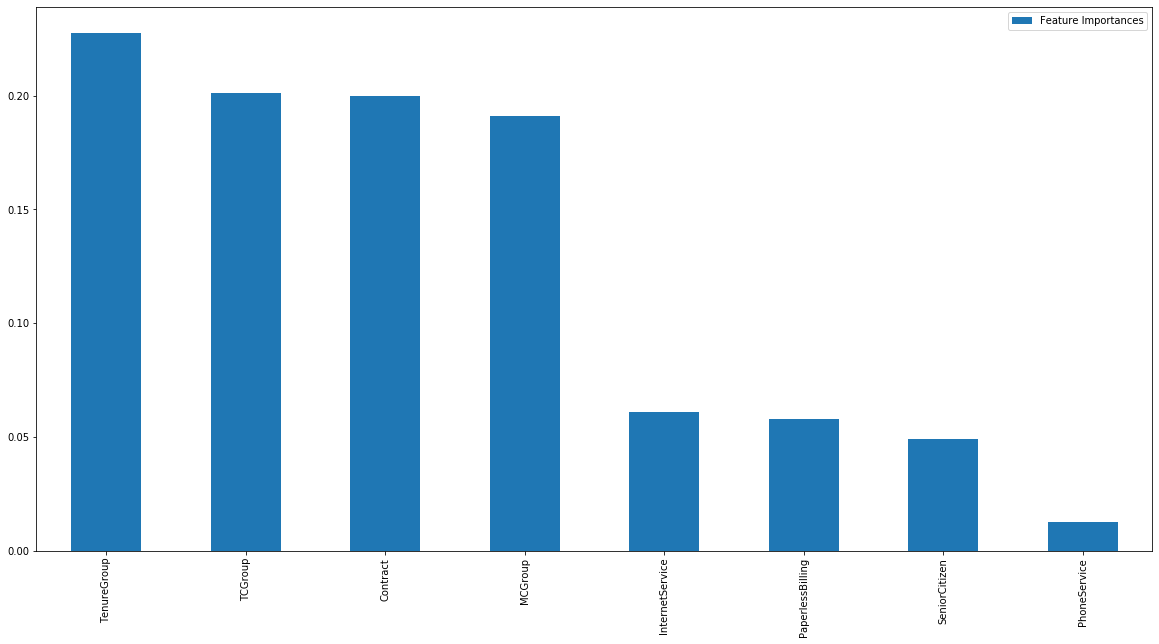

In [0]:
imp.sort_values(by='Feature Importances', ascending= False).plot(kind='bar', rot=90,figsize=(20, 10));

# Conclusion

*What you set out to do?*

If the duration of a customer staying with the company, the total and monthly charges paid by the customer, the type of the contract, internet service, phone service, and the preference of paperless billing for the customer and the customer's age would be good indicators of customer churning.

*What you learned along the way?*
I learned that just because customers take advantage of paperless billing and pay electronically can still mean they vote to churn. It's other factors that caused them to churn.

*What conclusions you were able to confidently come to?*
The tenure of the customer, the type of contract and the total/monthly charges of the customer predicts accurately when it comes to customer churning.
